▪ Data: MNIST

▪ Target: 10-class classification

▪ Make 3 DFNs with different architectures (# of hidden layers, nodes,
activation functions, dropout, BN, optimizers, etc.)

▪ Compare validation errors for 3 models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
# MNIST 데이터베이스는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스
# 다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용됨

In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# 1. Load Data
datax = np.load('/content/drive/MyDrive/MNIST.npy', allow_pickle=True)
datay = np.load('/content/drive/MyDrive/Label.npy', allow_pickle=True)

In [ ]:
# Data shape 확인
datax.shape, datay.shape

((60000, 28, 28), (60000,))

In [ ]:
# Data reshape
datax_reshape = datax.reshape([datax.shape[0], datax.shape[1]*datax.shape[2]])
datax_reshape_norm = datax_reshape/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_reshape_norm), np.min(datax_reshape_norm)))

최대 : 1.0, 최소 : 0.0


In [ ]:
datax_reshape_norm.shape

(60000, 784)

In [ ]:
# datay를 원핫인코딩 (다중 클래스 분류)
datay_onehot = to_categorical(datay)

print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# 데이터 셋 split
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_reshape_norm, datay_onehot, test_size=0.3, random_state=111)

In [ ]:
# 입력하는 벡터의 사이즈
input_shape = (datax_reshape_norm.shape[1],)

############### 모델1 ###############
# 모델1 선언
# activation : relu
# hidden layer : 4
# optimizer : Adam
mlp_model1 = models.Sequential()
mlp_model1.add(layers.Dense(units = 1000, activation = 'relu', input_shape=input_shape)) #input layer : MLP로 layer 만들어라
mlp_model1.add(layers.Dense(units = 2000, activation = 'relu')) #h1 layer : MLP로 layer 생성
mlp_model1.add(layers.Dense(units = 4000, activation = 'relu')) #h2 layer : MLP로 layer 생성
mlp_model1.add(layers.Dense(units = 2000, activation = 'relu')) #h3 layer : MLP로 layer 생성
mlp_model1.add(layers.Dense(units = 1000, activation = 'relu')) #h4 layer : MLP로 layer 생성
mlp_model1.add(layers.Dense(units = 10, activation = 'softmax')) #output layer : MLP로 layer 생성, activation은 softmax

mlp_model1.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 입력하는 벡터의 사이즈
input_shape = (datax_reshape_norm.shape[1],)

############### 모델2 ###############
# 모델2 선언
# activation : tanh
# hidden layer : 4
# optimizer : SGD
mlp_model2 = models.Sequential()
mlp_model2.add(layers.Dense(units = 1000, activation = 'tanh', input_shape=input_shape)) #input layer : MLP로 layer 만들어라
mlp_model2.add(layers.Dense(units = 2000, activation = 'tanh')) #h1 layer : MLP로 layer 생성
mlp_model2.add(layers.Dense(units = 4000, activation = 'tanh')) #h2 layer : MLP로 layer 생성
mlp_model2.add(layers.Dense(units = 2000, activation = 'tanh')) #h3 layer : MLP로 layer 생성
mlp_model2.add(layers.Dense(units = 1000, activation = 'tanh')) #h4 layer : MLP로 layer 생성
mlp_model2.add(layers.Dense(units = 10, activation = 'softmax')) #output layer : MLP로 layer 생성, activation은 softmax

mlp_model2.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 입력하는 벡터의 사이즈
input_shape = (datax_reshape_norm.shape[1],)

############### 모델3 ###############
# 모델3 선언
# activation : elu
# hidden layer : 3
# optimizer : RMSprop
mlp_model3 = models.Sequential()
mlp_model3.add(layers.Dense(units = 1000, activation = 'elu', input_shape=input_shape)) #input layer : MLP로 layer 만들어라
mlp_model3.add(layers.Dense(units = 1500, activation = 'elu')) #h1 layer : MLP로 layer 생성
mlp_model3.add(layers.Dense(units = 1500, activation = 'elu')) #h2 layer : MLP로 layer 생성
mlp_model3.add(layers.Dense(units = 1000, activation = 'elu')) #h3 layer : MLP로 layer 생성
mlp_model3.add(layers.Dense(units = 10, activation = 'softmax')) #output layer : MLP로 layer 생성, activation은 softmax

mlp_model3.compile(optimizer='RMSprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mlp_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │     8,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,804,010 (79.36 MB)

 Trainable params: 20,804,010 (79.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 mlp_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2000)           │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2000)           │     8,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,804,010 (79.36 MB)

 Trainable params: 20,804,010 (79.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 mlp_model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1500)           │     1,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1500)           │     2,251,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1000)           │     1,501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,049,010 (23.08 MB)

 Trainable params: 6,049,010 (23.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델1 학습
history1 = mlp_model1.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=15, epochs=15)


Epoch 1/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.8383 - loss: 0.5875 - val_accuracy: 0.9514 - val_loss: 0.2450
Epoch 2/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9528 - loss: 0.1901 - val_accuracy: 0.9608 - val_loss: 0.1636
Epoch 3/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9646 - loss: 0.1478 - val_accuracy: 0.9644 - val_loss: 0.1597
Epoch 4/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9695 - loss: 0.1207 - val_accuracy: 0.9683 - val_loss: 0.1501
Epoch 5/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9793 - loss: 0.0822 - val_accuracy: 0.9705 - val_loss: 0.1443
Epoch 6/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9808 - loss: 0.0741 - val_accuracy: 0.9594 - val_loss: 0.1679
Epoch 7/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9826 - loss: 0.0681 - val_accuracy: 0.9745 - val_loss: 0.1340
Epoch 8/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9865 - loss: 0

In [ ]:
# 모델2 학습
history2 = mlp_model2.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=15, epochs=30)

Epoch 1/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8623 - loss: 0.4790 - val_accuracy: 0.9109 - val_loss: 0.3009
Epoch 2/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9221 - loss: 0.2674 - val_accuracy: 0.9323 - val_loss: 0.2293
Epoch 3/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9417 - loss: 0.2031 - val_accuracy: 0.9467 - val_loss: 0.1771
Epoch 4/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9559 - loss: 0.1499 - val_accuracy: 0.9547 - val_loss: 0.1510
Epoch 5/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9658 - loss: 0.1187 - val_accuracy: 0.9587 - val_loss: 0.1358
Epoch 6/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9714 - loss: 0.0991 - val_accuracy: 0.9638 - val_loss: 0.1192
Epoch 7/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9747 - loss: 0.0830 - val_accuracy: 0.9656 - val_loss: 0.1094
Epoch 8/30
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9770 - loss: 0

In [ ]:
# 모델3 학습
history3 = mlp_model3.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=30, epochs=15)

Epoch 1/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7390 - loss: 1.7046 - val_accuracy: 0.9343 - val_loss: 0.2635
Epoch 2/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9197 - loss: 0.3444 - val_accuracy: 0.9363 - val_loss: 0.2851
Epoch 3/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9426 - loss: 0.2594 - val_accuracy: 0.9561 - val_loss: 0.2109
Epoch 4/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9548 - loss: 0.2079 - val_accuracy: 0.9527 - val_loss: 0.2741
Epoch 5/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9603 - loss: 0.1968 - val_accuracy: 0.9451 - val_loss: 0.2657
Epoch 6/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9668 - loss: 0.1760 - val_accuracy: 0.9544 - val_loss: 0.2744
Epoch 7/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9702 - loss: 0.1645 - val_accuracy: 0.9492 - val_loss: 0.2534
Epoch 8/15
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9760 - loss: 0.1523

In [ ]:
history1.history

{'accuracy': [0.9043809771537781,
  0.9546190500259399,
  0.9645476341247559,
  0.9713809490203857,
  0.9775476455688477,
  0.9793809652328491,
  0.9822142720222473,
  0.9852142930030823,
  0.9866428375244141,
  0.9878809452056885,
  0.9874761700630188,
  0.9906190633773804,
  0.989976167678833,
  0.990928590297699,
  0.9922857284545898],
 'loss': [0.3876916170120239,
  0.18529456853866577,
  0.14925609529018402,
  0.11685121059417725,
  0.08877559751272202,
  0.08155696094036102,
  0.07019909471273422,
  0.061711762100458145,
  0.05314910411834717,
  0.05106630176305771,
  0.05149933323264122,
  0.04030054435133934,
  0.044257886707782745,
  0.04791663959622383,
  0.030818089842796326],
 'val_accuracy': [0.9514444470405579,
  0.960777759552002,
  0.964388906955719,
  0.9682777523994446,
  0.9704999923706055,
  0.9594444632530212,
  0.9745000004768372,
  0.9666666388511658,
  0.9774444699287415,
  0.9745000004768372,
  0.9743333458900452,
  0.972777783870697,
  0.9794444441795349,
  0.

In [ ]:
history2.history

{'accuracy': [0.8941428661346436,
  0.923547625541687,
  0.9447380900382996,
  0.956928551197052,
  0.9657618999481201,
  0.9710714221000671,
  0.9751904606819153,
  0.9773333072662354,
  0.9809761643409729,
  0.9840714335441589,
  0.986547589302063,
  0.9889285564422607,
  0.9912142753601074,
  0.9924047589302063,
  0.9940000176429749,
  0.9955952167510986,
  0.9961666464805603,
  0.9970714449882507,
  0.9980714321136475,
  0.9981428384780884,
  0.9987618923187256,
  0.9987381100654602,
  0.9994285702705383,
  0.9993809461593628,
  0.9997380971908569,
  0.9997380971908569,
  0.9997380971908569,
  0.9999047517776489,
  0.9998095035552979,
  0.9999285936355591],
 'loss': [0.36385467648506165,
  0.25969380140304565,
  0.18964266777038574,
  0.1454266905784607,
  0.11677105724811554,
  0.09702126681804657,
  0.08237546682357788,
  0.0711136907339096,
  0.06124366819858551,
  0.05201873555779457,
  0.04444635286927223,
  0.0389428436756134,
  0.033559348434209824,
  0.029249604791402817,
 

In [ ]:
history3.history

{'accuracy': [0.8309285640716553,
  0.923880934715271,
  0.9450476169586182,
  0.9552618861198425,
  0.9603809714317322,
  0.965833306312561,
  0.9702619314193726,
  0.9738333225250244,
  0.9770476222038269,
  0.9789999723434448,
  0.9811905026435852,
  0.9808809757232666,
  0.9839761853218079,
  0.9846190214157104,
  0.9865714311599731],
 'loss': [0.7994897961616516,
  0.32819047570228577,
  0.25570517778396606,
  0.21513324975967407,
  0.19610118865966797,
  0.1850990355014801,
  0.17385829985141754,
  0.16027294099330902,
  0.14147529006004333,
  0.14182628691196442,
  0.12852056324481964,
  0.15053291618824005,
  0.10879294574260712,
  0.12068555504083633,
  0.1029990017414093],
 'val_accuracy': [0.9342777729034424,
  0.9363333582878113,
  0.9560555815696716,
  0.9526666402816772,
  0.9450555443763733,
  0.9544444680213928,
  0.9491666555404663,
  0.9681666493415833,
  0.9687777757644653,
  0.9671111106872559,
  0.9696111083030701,
  0.9685555696487427,
  0.9686111211776733,
  0.97

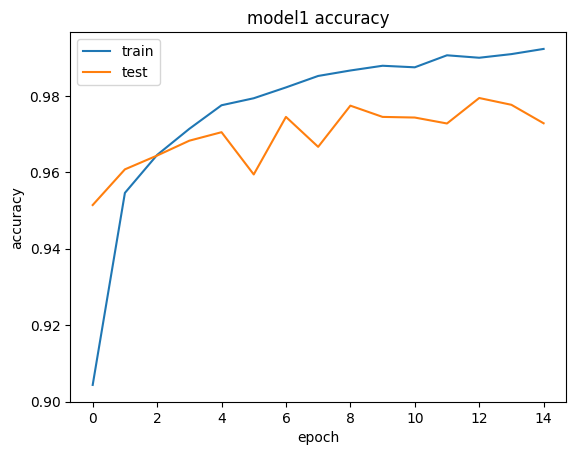

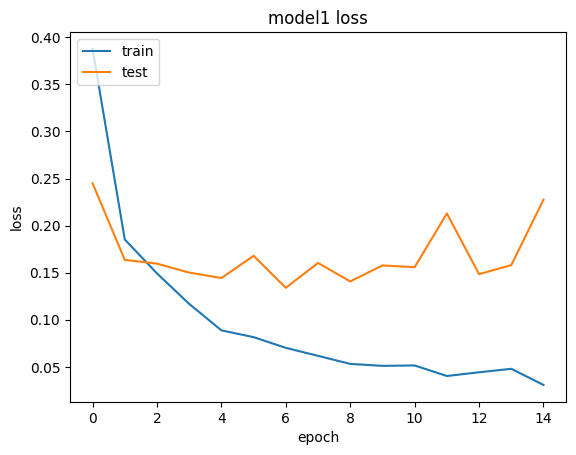

Model 1 Validation Accuracy History: [0.9514444470405579, 0.960777759552002, 0.964388906955719, 0.9682777523994446, 0.9704999923706055, 0.9594444632530212, 0.9745000004768372, 0.9666666388511658, 0.9774444699287415, 0.9745000004768372, 0.9743333458900452, 0.972777783870697, 0.9794444441795349, 0.9776666760444641, 0.9728333353996277]
Model 1 Final Validation Accuracy: 0.9728333353996277
Model 1 Max Validation Accuracy: 0.9794444441795349
Model 1 Validation Loss History: [0.24497553706169128, 0.16362294554710388, 0.15965795516967773, 0.1501437872648239, 0.14434044063091278, 0.16793136298656464, 0.13397906720638275, 0.16040046513080597, 0.1407434344291687, 0.1577381044626236, 0.15587402880191803, 0.21291904151439667, 0.14847394824028015, 0.15806148946285248, 0.22757644951343536]
Model 1 Final Validation Loss: 0.22757644951343536
Model 1 Min Validation Loss: 0.13397906720638275


In [ ]:
############### 모델1 ###############
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Accuracy
print("Model 1 Validation Accuracy History:", history1.history['val_accuracy'])
print("Model 1 Final Validation Accuracy:", history1.history['val_accuracy'][-1])
print("Model 1 Max Validation Accuracy:", np.max(history1.history['val_accuracy']))

#Loss
print("Model 1 Validation Loss History:", history1.history['val_loss'])
print("Model 1 Final Validation Loss:", history1.history['val_loss'][-1])
print("Model 1 Min Validation Loss:", np.min(history1.history['val_loss']))

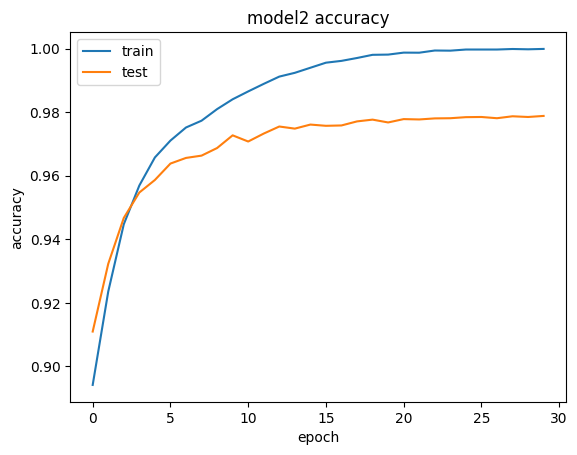

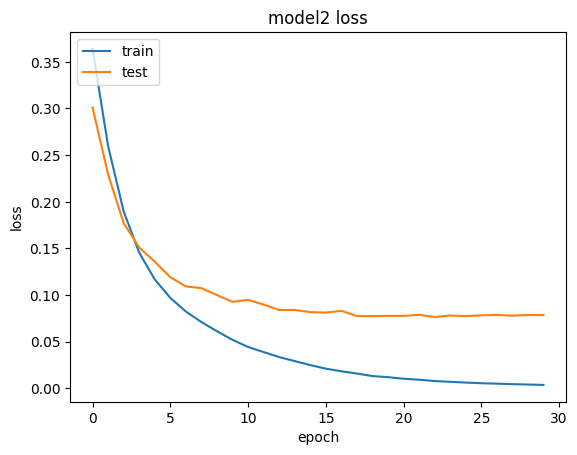

Model 2 Validation Accuracy History: [0.9109444618225098, 0.9322777986526489, 0.9467222094535828, 0.9547222256660461, 0.9586666822433472, 0.9638333320617676, 0.9656111001968384, 0.9663333296775818, 0.9687222242355347, 0.9727222323417664, 0.9707777500152588, 0.9732778072357178, 0.9754999876022339, 0.9748333096504211, 0.976111114025116, 0.9757221937179565, 0.9758333563804626, 0.9771111011505127, 0.9776666760444641, 0.9767777919769287, 0.9778333306312561, 0.9777222275733948, 0.9780555367469788, 0.9781110882759094, 0.9784444570541382, 0.9785000085830688, 0.9781110882759094, 0.9787222146987915, 0.9785000085830688, 0.9788333177566528]
Model 2 Final Validation Accuracy: 0.9788333177566528
Model 2 Max Validation Accuracy: 0.9788333177566528
Model 2 Validation Loss History: [0.30090561509132385, 0.22927284240722656, 0.17714828252792358, 0.15096870064735413, 0.13581331074237823, 0.11916942149400711, 0.10936205834150314, 0.10741623491048813, 0.10000282526016235, 0.09278620034456253, 0.09484429657

In [ ]:
############### 모델2 ###############
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Accuracy
print("Model 2 Validation Accuracy History:", history2.history['val_accuracy'])
print("Model 2 Final Validation Accuracy:", history2.history['val_accuracy'][-1])
print("Model 2 Max Validation Accuracy:", np.max(history2.history['val_accuracy']))

#Loss
print("Model 2 Validation Loss History:", history2.history['val_loss'])
print("Model 2 Final Validation Loss:", history2.history['val_loss'][-1])
print("Model 2 Min Validation Loss:", np.min(history2.history['val_loss']))

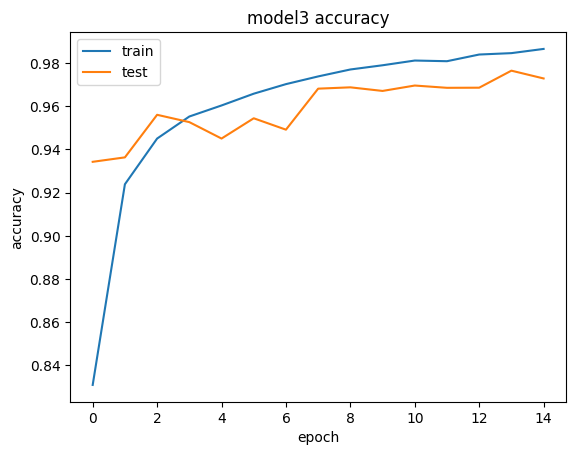

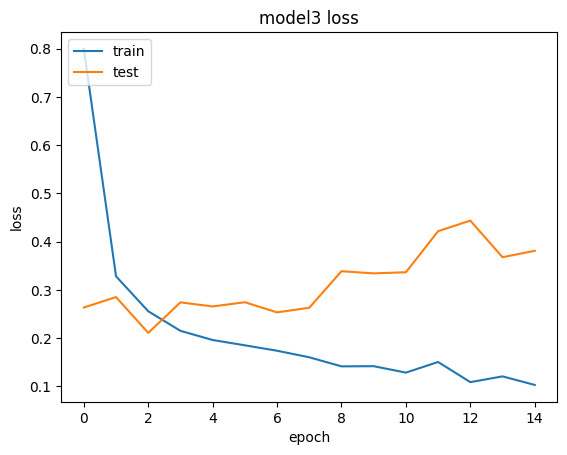

Model 3 Validation Accuracy History: [0.9342777729034424, 0.9363333582878113, 0.9560555815696716, 0.9526666402816772, 0.9450555443763733, 0.9544444680213928, 0.9491666555404663, 0.9681666493415833, 0.9687777757644653, 0.9671111106872559, 0.9696111083030701, 0.9685555696487427, 0.9686111211776733, 0.9764999747276306, 0.9728888869285583]
Model 3 Final Validation Accuracy: 0.9728888869285583
Model 3 Max Validation Accuracy: 0.9764999747276306
Model 3 Validation Loss History: [0.26349854469299316, 0.2850829064846039, 0.21086907386779785, 0.2741365134716034, 0.2656509578227997, 0.2743990421295166, 0.25338637828826904, 0.2630082964897156, 0.3387022316455841, 0.3342062830924988, 0.33654746413230896, 0.4216814935207367, 0.4436395764350891, 0.36775779724121094, 0.3809913694858551]
Model 3 Final Validation Loss: 0.3809913694858551
Model 3 Min Validation Loss: 0.21086907386779785


In [ ]:
############### 모델3 ###############
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Accuracy
print("Model 3 Validation Accuracy History:", history3.history['val_accuracy'])
print("Model 3 Final Validation Accuracy:", history3.history['val_accuracy'][-1])
print("Model 3 Max Validation Accuracy:", np.max(history3.history['val_accuracy']))

#Loss
print("Model 3 Validation Loss History:", history3.history['val_loss'])
print("Model 3 Final Validation Loss:", history3.history['val_loss'][-1])
print("Model 3 Min Validation Loss:", np.min(history3.history['val_loss']))

In [ ]:
np.where(history1.history['val_accuracy'] == np.max(history1.history['val_accuracy']))

(array([12]),)

In [ ]:
np.where(history2.history['val_accuracy'] == np.max(history2.history['val_accuracy']))

(array([29]),)

In [ ]:
np.where(history3.history['val_accuracy'] == np.max(history3.history['val_accuracy']))

(array([13]),)

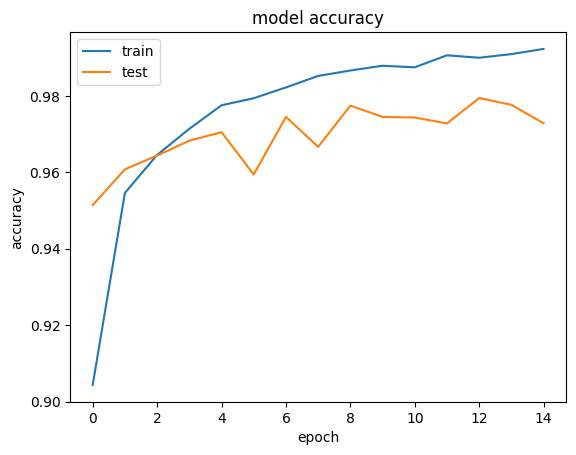

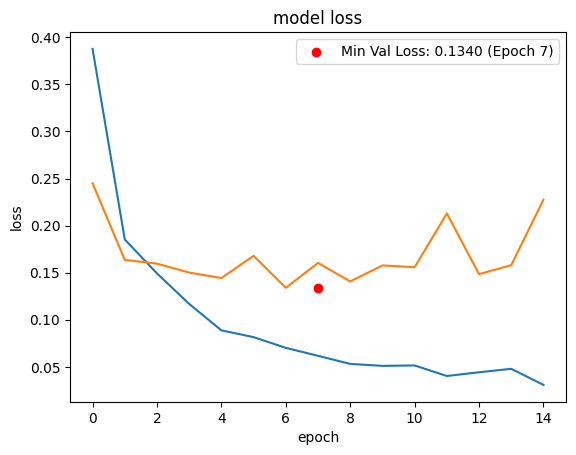

Final Validation Accuracy: 0.9728333353996277
Max Validation Accuracy: 0.9794444441795349
Final Validation Loss: 0.22757644951343536
Min Validation Loss: 0.13397906720638275
Epoch with Min Validation Loss: 7


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 가정: history는 모델 학습 결과를 담고 있는 History 객체

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# 검증 손실 최솟값과 그 epoch 찾기
min_val_loss = np.min(history1.history['val_loss'])
min_val_loss_epoch = np.argmin(history1.history['val_loss']) + 1 # epoch은 1부터 시작

# 그래프에 최솟값 표시
plt.scatter(min_val_loss_epoch, min_val_loss, color='red', marker='o', label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')
plt.legend(loc='upper right')
plt.show()

# 최종 검증 정확도 및 최대 검증 정확도 출력
print("Final Validation Accuracy:", history1.history['val_accuracy'][-1])
print("Max Validation Accuracy:", np.max(history1.history['val_accuracy']))

# 최종 검증 손실 및 최소 검증 손실 출력
print("Final Validation Loss:", history1.history['val_loss'][-1])
print("Min Validation Loss:", min_val_loss)
print("Epoch with Min Validation Loss:", min_val_loss_epoch)